In [258]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [259]:
# Import data and preprocessing
df = pd.read_csv("files/Case_PRB.csv", header = 0)
df = df.fillna(0)

df_netherlands = df[(df['location'] == "Netherlands")]

X = pd.to_datetime(df_netherlands['date'])
y = df_netherlands[['total_cases']]

C:\Users\nguye\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


[]

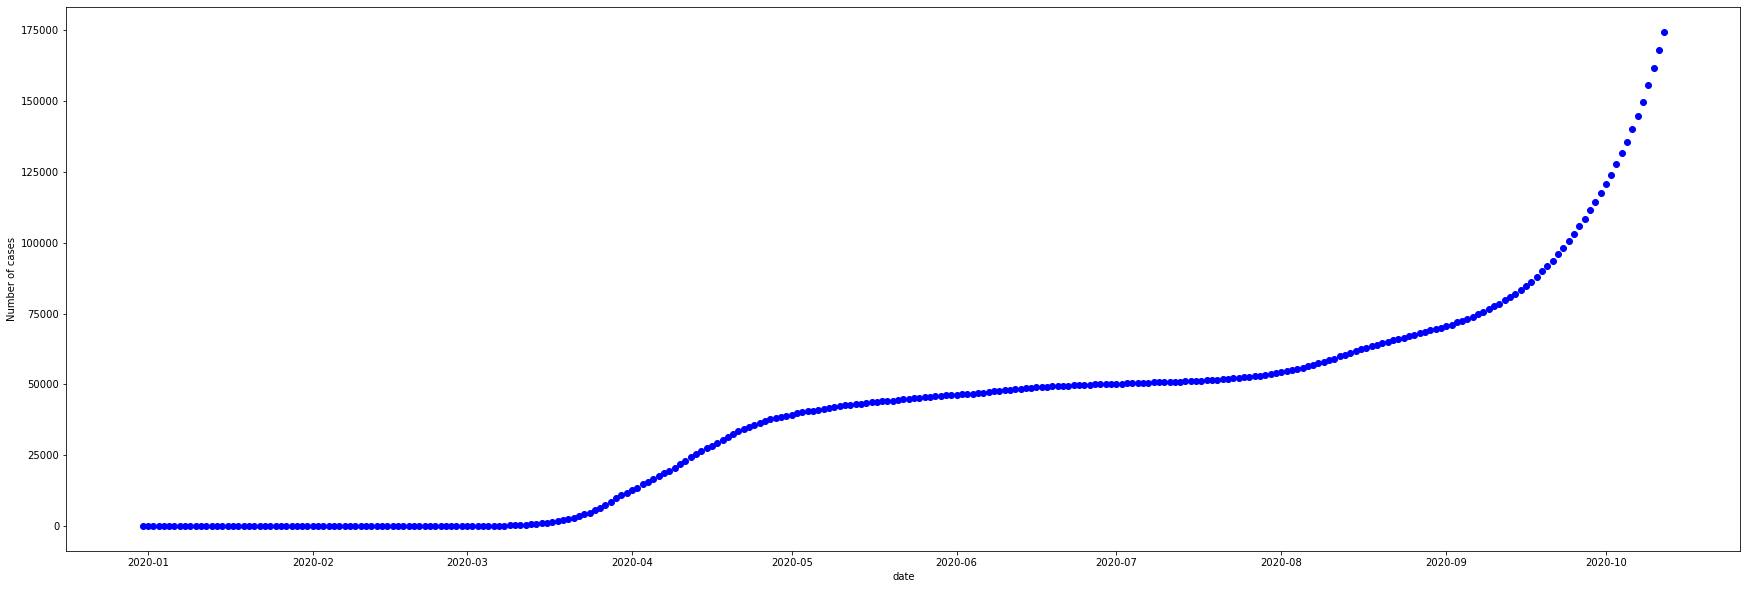

In [260]:
# Plotting the information
plt.rcParams["figure.figsize"] = (30, 10)
plt.scatter(X, y, color="blue")
plt.xlabel('date')
plt.ylabel('Number of cases')
plt.plot()

0.8427521380596705


[]

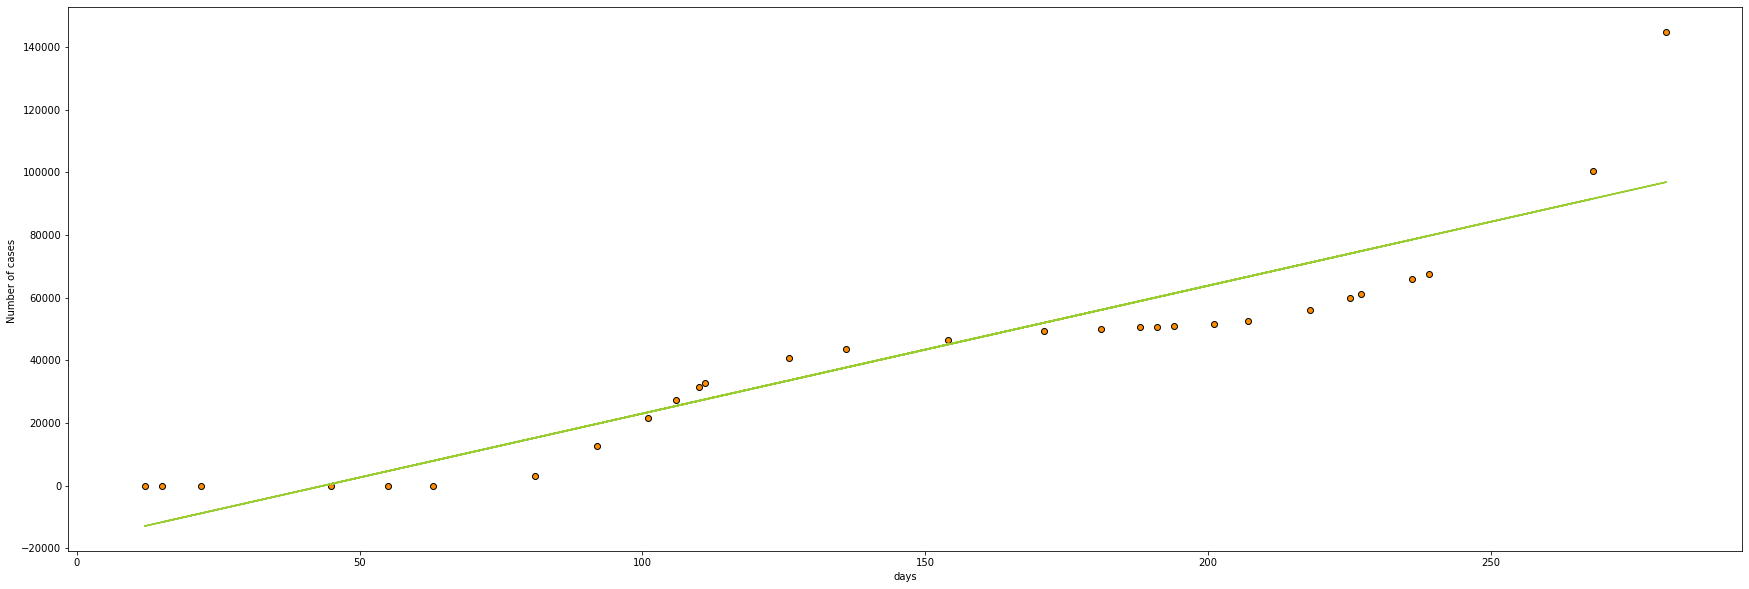

In [264]:

df_netherlands['time'] = np.arange(len(df_netherlands.index))
X = df_netherlands[['time']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.1, random_state = 0)

lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
accuracy_score = lr.score(X_test, y_test)

# this is the multiple R-squared of the prediction. This is measured how well the prediction line was predicted
# The score is quite impressive given the input data and the complex nature bahaviour of the virus. However, I think we can do better with other models  
print(accuracy_score)
# plt.scatter(X_test, y_test, edgecolor="black", c="darkorange", label="new cases")
plt.scatter(X_test, y_test, edgecolor="black", c="darkorange", label="new cases")
plt.plot(X_test, predictions, color="yellowgreen")
plt.xlabel('days')
plt.ylabel('Number of cases ')
plt.plot()

In [317]:
df = df[(df['location'] == "Netherlands")]
df['time'] = np.arange(len(df.index))
X2  = df[["time", "total_deaths"]]
y = df_netherlands[['total_cases']]

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size =0.2, random_state = 0)

x_surf, y_surf = np.meshgrid(np.linspace(X_test['time'].min(), X_test['time'].max(), 29), np.linspace(X_test['total_deaths'].min(), X_test['total_deaths'].max(), 29))

lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(pd.DataFrame({'Time': x_surf.ravel(), 'Mortality': y_surf.ravel()}))
accuracy_score = lr.score(X_test, y_test)
r2 = r2_score(y_test, predictions)

predictions = np.array(predictions)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection = '3d')
# ax.scatter(X_test['time'], X_test['total_deaths'], y_test, c='red', alpha=0.5)
# ax.plot_surface(x_surf, y_surf, predictions.reshape(x_surf.shape))
# ax.set_xlabel('Number of days')
# ax.set_ylabel('Total deaths')
# ax.set_zlabel('Number of covid')

# draw plate



ValueError: Found input variables with inconsistent numbers of samples: [58, 841]